In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [4]:
import time

import numpy as np
import pandas as pd

from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from src.utils import eval_model, scale
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import seaborn as sns


mae = 'neg_mean_absolute_error'
mse = 'neg_mean_squared_error'
rmse = 'neg_root_mean_squared_error'
roc_auc = 'neg_roc_auc_score'
N_JOBS = 24
RANDOM_SEED = 42

# prepare models
models = {}

# models['LR'] = LogisticRegression()
# 
# models['Ridge'] = RidgeClassifier()
# 
# models['DT'] = DecisionTreeClassifier(random_state=RANDOM_SEED)

# models['Lasso'] = Lass()

# models['KNN'] = KNeighborsClassifier(n_jobs=N_JOBS)

# models['SVC'] = SVC()

models['RF'] = RandomForestClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS)

models['HistGB'] = HistGradientBoostingClassifier(random_state=RANDOM_SEED)

models['XGB'] = xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbosity=0,)

models['XGB_GPU'] = xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbosity=0, device = "cuda") 
                                  # tree_method='gpu_hist', predictor='gpu_predictor')

# models['CB'] = cb.CatBoostClassifier(iterations=400, random_seed=RANDOM_SEED, thread_count=N_JOBS, verbose=False)
# 
# models['CB_GPU'] = cb.CatBoostClassifier(iterations=400, random_seed=RANDOM_SEED, thread_count=N_JOBS, verbose=False, task_type="GPU")

models['LGB'] = lgb.LGBMClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbose=-1)

# Stacked datasets

In [6]:
X = pd.read_pickle('../data/processed/X_train_all.pkl.zip')
# X = pd.read_pickle('../data/processed/X_train.pkl.zip')
y = pd.read_pickle('../data/processed/y_train.pkl')

RF              0.8631    (0.870 ± 0.007)    12.5s
HistGB          0.8976    (0.905 ± 0.008)    334.0s
XGB             0.8944    (0.901 ± 0.007)    188.6s
XGB_GPU         0.8962    (0.901 ± 0.005)    112.2s
LGB             0.8979    (0.907 ± 0.009)    172.1s


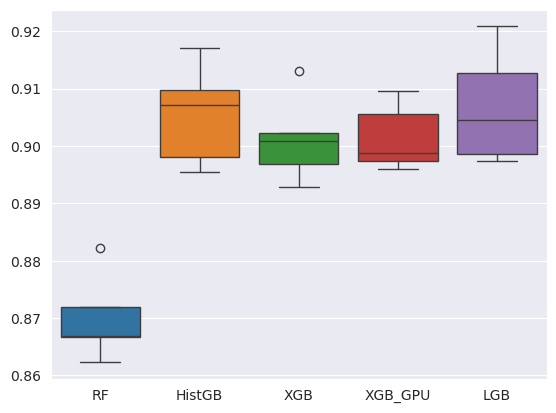

In [36]:
results = {}

for name, model in models.items():
    # X = scale(X)
    
    results[name] = eval_model(name, model, X, y)
    
results = pd.DataFrame(results)
sns.boxplot(results);

In [32]:
clf = xgb.XGBClassifier(random_state=RANDOM_SEED, verbosity=0, device = "cuda")
clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [8]:
ids = clf.feature_importances_.argsort()[-50:].astype(int)
eval_model('50', models['XGB_GPU'], X.iloc[:, ids], y);

50              0.8859    (0.894 ± 0.008)    1.8s


In [11]:
ids = clf.feature_importances_.argsort()[-100:].astype(int)
eval_model('100', models['XGB_GPU'], X.iloc[:, ids], y);

100             0.8942    (0.902 ± 0.007)    2.1s


In [10]:
ids = clf.feature_importances_.argsort()[-200:].astype(int)
eval_model('200', models['XGB_GPU'], X.iloc[:, ids], y);

200             0.8967    (0.906 ± 0.009)    3.1s


In [12]:
ids = clf.feature_importances_.argsort()[-400:].astype(int)
eval_model('400', models['XGB_GPU'], X.iloc[:, ids], y);

400             0.8992    (0.907 ± 0.008)    4.9s


In [18]:
ids = clf.feature_importances_.argsort()[-600:].astype(int)
eval_model('400', models['XGB_GPU'], X.iloc[:, ids], y);

400             0.9033    (0.908 ± 0.005)    6.6s


In [33]:
ids = clf.feature_importances_.argsort()[-800:].astype(int)
eval_model('800', models['XGB_GPU'], X.iloc[:, ids], y);

800             0.9063    (0.910 ± 0.003)    8.7s


In [14]:
ids = clf.feature_importances_.argsort()[-1200:].astype(int)
eval_model('1200', models['XGB_GPU'], X.iloc[:, ids], y);

1200            0.9040    (0.911 ± 0.007)    12.6s


In [15]:
ids = clf.feature_importances_.argsort()[-1600:].astype(int)
eval_model('1600', models['XGB_GPU'], X.iloc[:, ids], y);

1600            0.9036    (0.908 ± 0.004)    16.0s


In [16]:
ids = clf.feature_importances_.argsort()[-3200:].astype(int)
eval_model('3200', models['XGB_GPU'], X.iloc[:, ids], y);

3200            0.8993    (0.906 ± 0.006)    22.3s


In [17]:
ids = clf.feature_importances_.argsort()[-6400:].astype(int)
eval_model('6400', models['XGB_GPU'], X.iloc[:, ids], y);

6400            0.8975    (0.905 ± 0.007)    33.0s


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=RANDOM_SEED)

In [37]:
eval_model('full', models['XGB_GPU'], X, y, cv=rskf);

800             0.8945    (0.903 ± 0.008)    285.7s


In [34]:
ids = clf.feature_importances_.argsort()[-800:].astype(int)
eval_model('800', models['XGB_GPU'], X.iloc[:, ids], y, cv=rskf);

800             0.9010    (0.907 ± 0.006)    41.2s


In [36]:
ids = clf.feature_importances_.argsort()[-1600:].astype(int)
eval_model('1600', models['XGB_GPU'], X.iloc[:, ids], y, cv=rskf);

1600            0.8987    (0.906 ± 0.007)    78.3s


In [35]:
ids = clf.feature_importances_.argsort()[-400:].astype(int)
eval_model('400', models['XGB_GPU'], X.iloc[:, ids], y, cv=rskf);

400             0.8976    (0.906 ± 0.008)    22.6s


# decorrelated feats

In [22]:
from src.corr import non_corr_features

X_uncor = non_corr_features(pd.DataFrame(X), y, threshold=0.99)
X.shape[1], X_uncor.shape[1]

(11741, 11210)

In [31]:
X_uncor = non_corr_features(pd.DataFrame(X), y, threshold=0.9)
print(X.shape[1], X_uncor.shape[1])
eval_model('corr < 0.9', models['XGB_GPU'], X_uncor, y, cv=rskf);

11741 10518
corr < 0.9      0.8979    (0.905 ± 0.007)    47.2s


In [30]:
X_uncor = non_corr_features(pd.DataFrame(X), y, threshold=0.8)
print(X.shape[1], X_uncor.shape[1])
eval_model('corr < 0.8', models['XGB_GPU'], X_uncor, y, cv=rskf);

11741 9773
corr < 0.8      0.8979    (0.904 ± 0.006)    42.4s


In [28]:
X_uncor = non_corr_features(pd.DataFrame(X), y, threshold=0.7)
print(X.shape[1], X_uncor.shape[1])
eval_model('corr < 0.7', models['XGB_GPU'], X_uncor, y, cv=rskf);

11741 8911
corr < 0.7      0.8942    (0.902 ± 0.008)    36.6s


In [29]:
X_uncor = non_corr_features(pd.DataFrame(X), y, threshold=0.6)
print(X.shape[1], X_uncor.shape[1])
eval_model('corr < 0.6', models['XGB_GPU'], X_uncor, y, cv=rskf);

11741 7927
corr < 0.6      0.8939    (0.900 ± 0.006)    32.3s
